In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.style.use('dark_background')
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
df=pd.read_csv("heart.csv")
df.head()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
#Output variable
print(df['output'].value_counts())
#fig = plt.figure(figsize = (10,6))
#sns.countplot(x="output",data=df,palette='flare')
#plt.show()

ax=px.pie(df, names= "output" ,template= "plotly_dark",title="Output",hole=0.8)
ax.show()

1    165
0    138
Name: output, dtype: int64


C:\Users\RISHAV KARMAHAPATRA\AppData\Local\Temp\ipykernel_14088\841452191.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




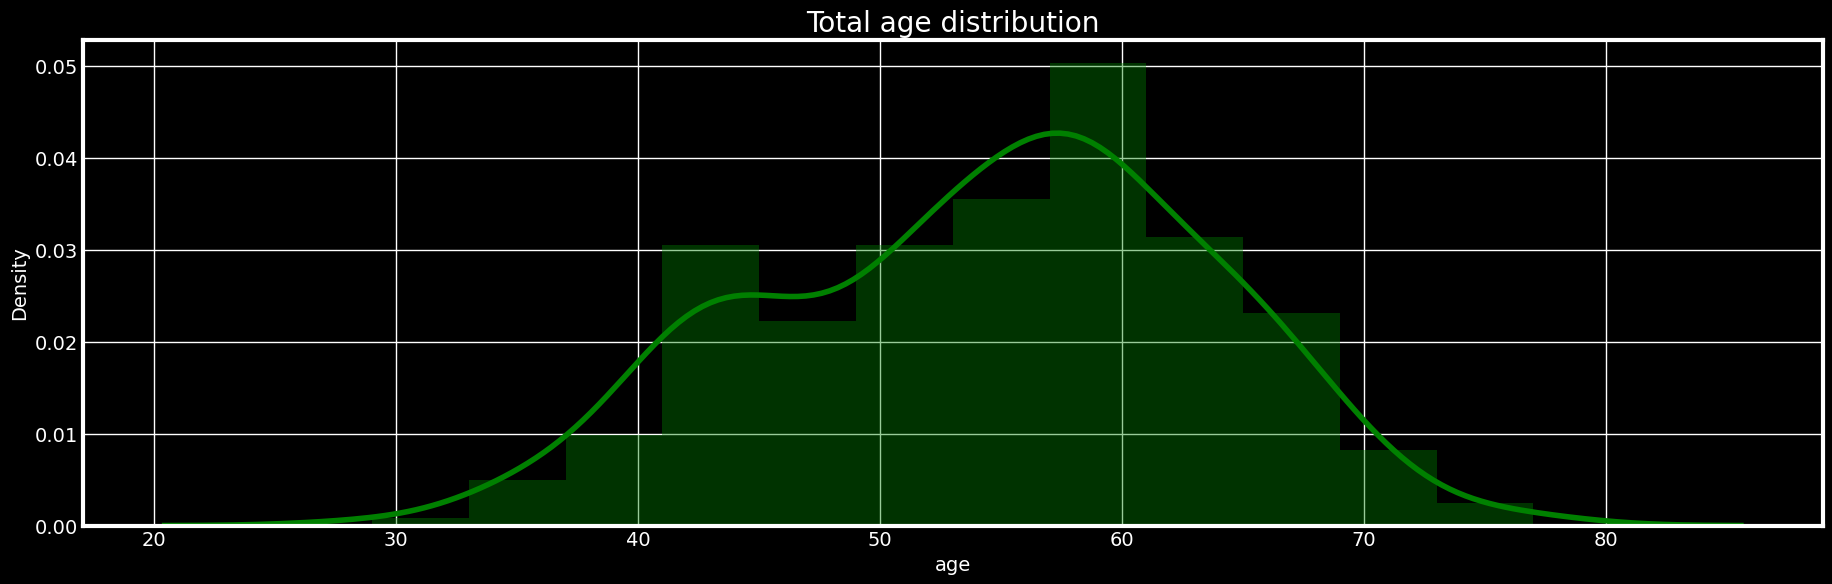

In [9]:
plt.figure(figsize=(20,6))
sns.distplot(df["age"],color="green",bins="auto")
plt.title("Total age distribution")
plt.show()

ax= px.histogram(df,x= "age", template= "plotly_dark",color= "output",title='Output 0 or 1')
ax.show()

ax= px.histogram(df,x= "age", template= "plotly_dark",color= "sex",title='Male vs Female age distribution')
ax.show()

In [11]:
#Data Splitting
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
X=df.iloc[:,:13]
Y=df["output"]

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=65) 

#MinMax Scaling / Normalization of data
MM_scaler = MinMaxScaler()
X_train = MM_scaler.fit_transform(X_train)
X_test = MM_scaler.fit_transform(X_test)

In [35]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import confusion_matrix,accuracy_score,precision_recall_fscore_support
def compute(Y_pred,Y_test):
    #Output plot
    plt.figure(figsize=(12,6))
    plt.scatter(range(len(Y_pred)),Y_pred,color="yellow",lw=5,label="Predictions")
    plt.scatter(range(len(Y_test)),Y_test,color="red",label="Actual")
    plt.title("Prediction Values vs Real Values")
    plt.legend()
    plt.show()
    cm=confusion_matrix(Y_test,Y_pred)
    class_label = ["High-risk", "Low-risk"]
    df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
    sns.heatmap(df_cm,annot=True,cmap='Pastel1',linewidths=2,fmt='d')
    plt.title("Confusion Matrix",fontsize=15)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()
    acc = accuracy_score(Y_test, Y_pred)
    mse = mean_squared_error(Y_test, Y_pred)
    precision, recall, fscore, train_support = precision_recall_fscore_support(Y_test, Y_pred, pos_label=1, average='binary')
    
    print('Precision: {} \nRecall: {} \nF1-Score: {} \nAccuracy: {} %\nMean Square Error: {}'.format(
        round(precision, 3), round(recall, 3), round(fscore, 3), round((acc * 100), 3), round((mse), 3)))


Execution time of model: 0.0 seconds


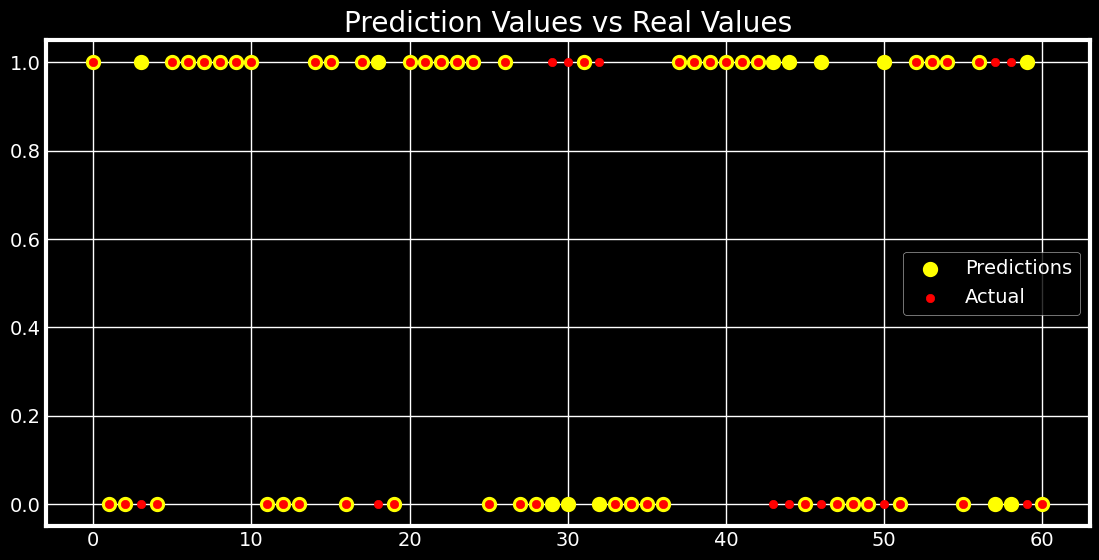

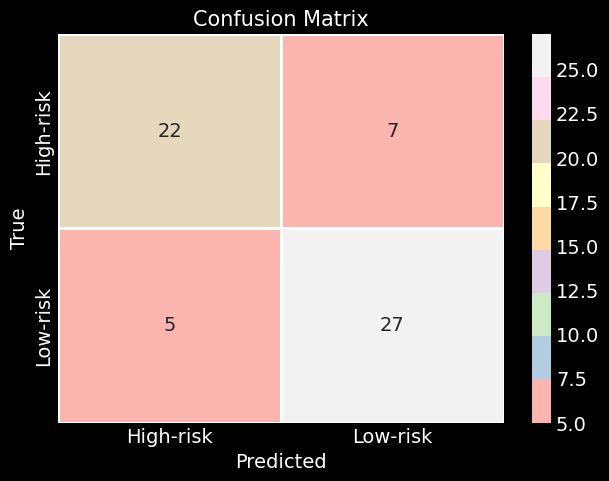

Precision: 0.794 
Recall: 0.844 
F1-Score: 0.818 
Accuracy: 80.328 %
Mean Square Error: 0.197


In [36]:
import time
from sklearn.tree import DecisionTreeClassifier
start=time.time()

model_tree=DecisionTreeClassifier(random_state=10,criterion="gini",max_depth=100)
model_tree.fit(X_train,Y_train)
Y_pred=model_tree.predict(X_test)

end=time.time()

model_tree_time=end-start
model_tree_accuracy=round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy

print(f"Execution time of model: {round((model_tree_time),5)} seconds")
#Plot and compute metric
compute(Y_pred,Y_test)

Execution time of model: 0.03801 seconds


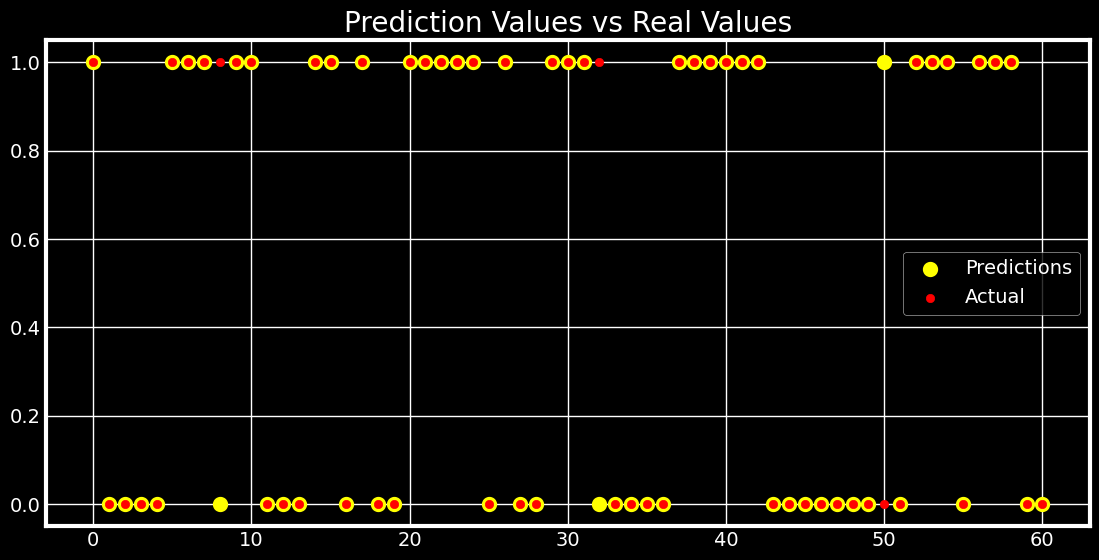

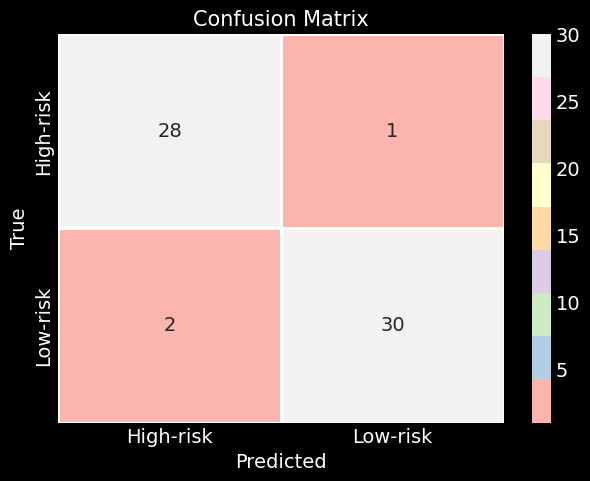

Precision: 0.968 
Recall: 0.938 
F1-Score: 0.952 
Accuracy: 95.082 %
Mean Square Error: 0.049


In [37]:

from xgboost import XGBClassifier
start=time.time()

model_xgb = XGBClassifier(objective='binary:logistic',learning_rate=0.1,
                          max_depth=1,
                          n_estimators = 50,
                          colsample_bytree = 0.5)
model_xgb.fit(X_train,Y_train)
Y_pred = model_xgb.predict(X_test)
end=time.time()

model_xgb_time=end-start
model_xgb_accuracy=round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy

print(f"Execution time of model: {round((model_xgb_time),5)} seconds")
#Plot and compute metric
compute(Y_pred,Y_test)